<a href="https://colab.research.google.com/github/kunalburgul/Learning/blob/master/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Supervised and Unsupervised Learning**

- A problem in which we are required to predict a value is known as a supervised problem. For example, if the problem is to predict house prices given historical house prices, with features like presence of a hospital, school or supermarket, distance to nearest public transport, etc. is a supervised problem

- Unsupervised datasets do not have a target associated with them and in general, are more challenging to deal with when compared to supervised problems.

- Clustering is one of the approaches that you can use for problems like this, but it must be noted that there are several other approaches available that can be applied to unsupervised problems.

- To make sense of unsupervised problems, we can also use numerous decomposition techniques such as Principal Component Analysis (PCA), t-distributed Stochastic Neighbour Embedding (t-SNE) etc.

**Iniatilization**

In [ ]:
# Loading Libraries

# Warning Librarires
import warnings 
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries 
import numpy as np
import pandas as pd

# Data Visualization Libraries :
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# This line ensures that the plot is displayed inside the notebook
%matplotlib inline 

# ML Libraries
from sklearn import datasets
from sklearn import manifold
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection

In the next part of the code, we will be fetching the **MNIST** data using sklearn datasets.

In [ ]:
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

Here the data contains the two arrays as 
- pixel_values as the array of pixels
- targets are the string types we convert them to integers.

Lets look at the structure of the following arrays.

In [ ]:
pixel_values.shape, targets.shape

((70000, 784), (70000,))

We can visualize the samples in this dataset by reshaping them to their original shape and then plotting them using matplotlib.

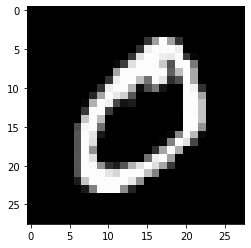

In [ ]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [ ]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

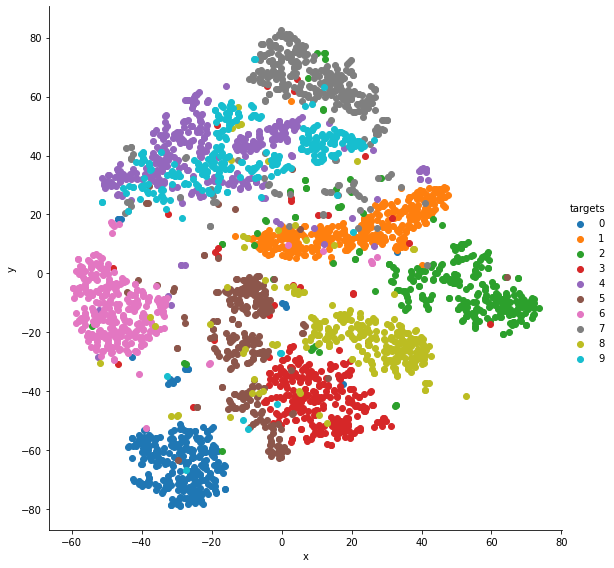

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

## **Cross-validation**

- Cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit.

 But this leads to another term: overfitting

In [ ]:
# Loading data
!gdown --id 1f_-Ol1h92ARtWsG7YqRcR9OOnKugl2gL --output winequality-red.csv

Downloading...
From: https://drive.google.com/uc?id=1f_-Ol1h92ARtWsG7YqRcR9OOnKugl2gL
To: /content/winequality-red.csv
100% 84.2k/84.2k [00:00<00:00, 1.32MB/s]


The dataset can be found on the following link - https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/


Now Let's look at the data

In [ ]:
df = pd.read_csv("winequality-red.csv",sep=';')

We can treat this problem either as a classification problem or as a regression problem since wine quality is nothing but a real number between 0 and 10. For simplicity, let’s choose classification. This dataset, however, consists of only six
types of quality values. We will thus map all quality values from 0 to 5.

In [ ]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [ ]:
# you can use the map function of pandas with any dictionary to convert the values in a given column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [ ]:
# Lets check if we have mapped correctly and observer the frequency of the quality values
df.quality.value_counts(normalize=True)

2    0.425891
3    0.398999
4    0.124453
1    0.033146
5    0.011257
0    0.006254
Name: quality, dtype: float64

Lets look at the all the attributes present in the data.

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

When we look at this data and consider it a classification problem, a lot of algorithms come to our mind that we can apply to it, probably, we can use neural networks. But it would be a bit of a stretch if we dive into neural networks from the beginning. So, let’s start with something simple that we can visualize too: 
decision trees.

Before we begin to understand what overfitting is, let’s divide the data into two parts. This dataset has **1599** samples. We keep **1000** samples for **training** and **599** as a **separate set**.



In [ ]:
# use sample with frac=1 to shuffle the dataframewe reset the indices since they change after shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Now lets select top 1000 rows for training
df_train = df.head(1000)

# Remaining bottom 599 rows are selected for testing/Validation
df_test = df.tail(599)

In [ ]:
# initialize decision tree classifier class with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth= 3)

In [ ]:
# choose the columns you want to train on these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', \
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', \
'pH', 'sulphates', 'alcohol']

In [ ]:
# train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Note that I have used a max_depth of 3 for the decision tree classifier. I have left all other parameters of this model to its default value.

Now, we test the accuracy of this model on the training set and the test set:


In [ ]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

In [ ]:
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

In [ ]:
# calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions)

# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions)

print('The training and test accuracies are found to be', train_accuracy * 100, ' and ', test_accuracy * 100)

The training and test accuracies are found to be 57.4  and  53.42237061769616


Now if we try to increase the max_depth to 7 and repeat the process. Let's look

In [ ]:
clf_1 = tree.DecisionTreeClassifier(max_depth= 7)
clf_1.fit(df_train[cols], df_train.quality)

# generate predictions on the training set
train_predictions_1 = clf_1.predict(df_train[cols])

# generate predictions on the test set
test_predictions_1 = clf_1.predict(df_test[cols])

# calculate the accuracy of predictions on training data set
train_accuracy_1 = metrics.accuracy_score(
df_train.quality, train_predictions_1)

# calculate the accuracy of predictions on test data set
test_accuracy_1 = metrics.accuracy_score(
df_test.quality, test_predictions_1)

print('The training and test accuracies are found to be', train_accuracy_1 * 100, ' and ', test_accuracy_1 * 100)

The training and test accuracies are found to be 75.6  and  59.09849749582637


- We could observe that accuracy increases as we increase the max-depth from 3 to 7.

- Here, we have used accuracy, mainly because it
is the most straightforward metric. It might not be the best metric for this problem.

What about we calculate these accuracies for different values of max_depth and
make a plot?



In [ ]:
# this is our global size of label text on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [ ]:
# initialize lists to store accuracies for training and test data we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [ ]:
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf_2 = tree.DecisionTreeClassifier(max_depth=depth)
    
    # fit the model on given features
    clf_2.fit(df_train[cols], df_train.quality)

    # create training & test predictions
    train_predictions_2 = clf_2.predict(df_train[cols])
    test_predictions_2 = clf_2.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy_2 = metrics.accuracy_score(df_train.quality, train_predictions_2)
    test_accuracy_2 = metrics.accuracy_score(df_test.quality, test_predictions_2)

    # append accuracies
    train_accuracies.append(train_accuracy_2)
    test_accuracies.append(test_accuracy_2)

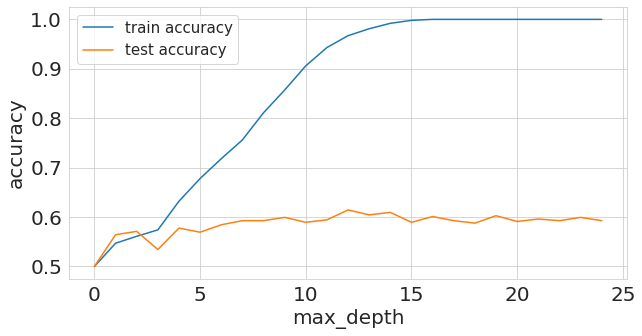

In [ ]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

- We see that the best score for test data is obtained when max_depth has a value of 14. As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. 

- It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all. 

This is called as overfitting.

- The model fits perfectly on the training set and performs poorly when it comes to the test set. 

- This means that the model will learn the training data well but will not generalize on unseen samples. 

- In the dataset above, one can build a model with very high max_depth which will have outstanding results on training data, but that kind of model is not useful as it will not provide a similar result on the real-world samples
or live data.



- One might argue that this approach isn’t overfitting as the accuracy of the test set more or less remains the same. 

- Another definition of overfitting would be when the test loss increases as we keep improving training loss. This is very common when it comes to **neural networks**.


- If we have a very large network for a dataset which is
quite small (i.e. very less number of samples), we will observe that the loss for both training and test set will decrease as we keep training. 

- However, at some point, test loss will reach its minima, and after that, it will start increasing even though training loss decreases further. We must stop training where the validation loss reaches its
minimum value.


Now we can go back to cross-validation.

While explaining about overfitting, we decided to divide the data into two parts. We trained the model on one part and checked its performance on the other part. 

Well, this is also a kind of cross-validation commonly known as a **hold-out set**. We use this kind of (cross-) validation when we have a large amount of data and model inference is a time-consuming process.


There are many different ways one can do cross-validation, and it is the most critical step when it comes to building a good machine learning model which is generalizable when it comes to unseen data.

Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets. However, there are a few types of cross-validation techniques which are the most popular and widely used.

These include:

- k-fold cross-validation
- stratified k-fold cross-validation
- hold-out based validation
- leave-one-out cross-validation
- group k-fold cross-validation


Let's look at the code for the k-fold cross-validation i.e random k-fold cross-validation.

In [ ]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    # Training data is in a CSV file called train.csv
    dt = pd.read_csv("winequality-red.csv",sep=';')
    
    # we create a new column called kfold and fill it with -1
    dt["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    dt = dt.sample(frac=1).reset_index(drop=True)
    
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
    
    # save the new csv with kfold column
    dt.to_csv("train_folds.csv", index=False)

For the wine dataset, let’s look at the distribution of labels.


Text(0, 0.5, 'count')

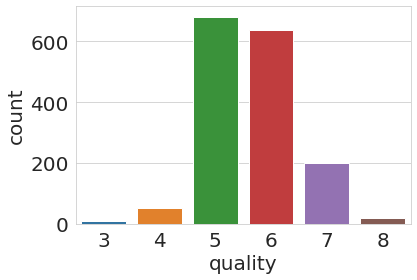

In [ ]:
b = sns.countplot(x='quality', data=dt)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Now let's look at the stratifiedKFold

In [ ]:
if __name__ == "__main__":
    # Training data is in a csv file called train.csv
    df_1 = pd.read_csv("winequality-red.csv",sep=';')

    # we create a new column called kfold and fill it with -1
    df_1["kfold"] = -1

    # the next step is to randomize the rows of the data
    df_1 = df_1.sample(frac=1).reset_index(drop=True)

    # fetch targets
    y_1 = df_1.quality.values

    # initiate the kfold class from model_selection module
    kf_1 = model_selection.StratifiedKFold(n_splits=5)

    # fill the new kfold column
    for f, (t_, v_) in enumerate(kf_1.split(X=df_1, y=y_1)):
        df_1.loc[v_, 'kfold'] = f
        
    # save the new csv with kfold column
    df_1.to_csv("train_folds.csv", index=False)

For the wine dataset, let’s look at the distribution of labels.


Text(0, 0.5, 'count')

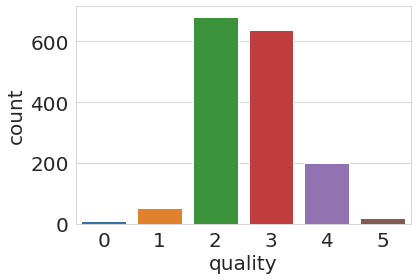

In [ ]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

 Depending on which algorithm we choose, training and even validation can be very expensive for a dataset which is of this size. In these
cases, we can opt for a hold-out based validation

To use stratified k-fold for a regression problem, we have first to divide the target into bins, and then we can use stratified k-fold in the same way as for classification
problems. 

- There are several choices for selecting the appropriate number of bins. 
- If we have a lot of samples( > 10k, > 100k), then you don’t need to care about the number of bins. Just divide the data into 10 or 20 bins. 

- If you do not have a lot of samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate
number of bins.

**Sturge’s Rule**

Number of Bins = 1 + log<sub>2</sub>(N)


In [ ]:
def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1

    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)

    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int (np.floor(1 + np.log2(len(data))))

    # bin targets
    data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)

    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    # drop the bins column
    data = data.drop("bins", axis=1)

    # return dataframe with folds
    return data

if __name__ == "__main__":
    # we create a sample dataset with 15000 samples
    # and 100 features and 1 target
    X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1)

    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(X,
    columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:, "target"] = y

    # create folds
    df = create_folds(df)

Cross-validation is the first and most essential step when it comes to building machine learning models.
- If you want to do **feature engineering, split your data first**.
- If you're going to **build models**, split your data first**. 
- If you have a **good cross-
validation scheme** in which validation data is representative of training and real- world data, you will be able to build a good machine learning model which is highly generalizable.


There is no way to combine GroupKFold with StratifiedKFold ttry to solve it.

## **Evulation metrics**

When it comes to machine learning problems, you will encounter a lot of different types of metrics in the real world. 

Sometimes, people even end up creating metrics
that suit the business problem

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply
AUC (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)

When it comes to regression, the most commonly used evaluation metrics are:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R2

Now let's go one-by-one in detail and understand which metric should be used where.

For better understanding we will be considering a **siim-acr-pneumothorax-segmentation dataset** form the kaggle.


**Accuracy**: It is one of the most straightforward metrics used in machine learning.
It defines how accurate your model is. For the problem described above, if you build
a model that classifies 90 images accurately, your accuracy is 90% or 0.90. If only 83 images are classified correctly, the accuracy of your model is 83% or 0.83.

Python code for calculating accuracy is also quite simple


In [ ]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [ ]:
# We can also calculate accuracy using scikit-learn.
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

When there is some imbbalance in the dataset like around 90% to 10%. we could see that the dataset is skewed, i.e., the number of samples in one class outnumber the number of samples in other class by a lot. 

In these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it is not representative of the data.

So, you might get high accuracy, but your model
will probably not perform that well when it comes to real-world samples.

In these cases, it’s better to look at other metrics such as precision.


Before learning about precision, we need to know a few terms. Here we have
assumed that chest x-ray images with pneumothorax are positive class  and
without pneumothorax are negative class.

**True positive (TP)**: Given an image, if your model predicts the image has
pneumothorax, and the actual target for that image has pneumothorax, it is
considered a true positive.

**True negative (TN)**: Given an image, if your model predicts that the image does not have pneumothorax and the actual target says that it is a non-pneumothorax image, it is considered a true negative.
In simple words, if your model correctly predicts positive class, it is true positive, and if your model accurately predicts negative class, it is a true negative.

**False positive (FP)**: Given an image, if your model predicts pneumothorax and the
actual target for that image is non- pneumothorax, it a false positive.

**False negative (FN)**: Given an image, if your model predicts non-pneumothorax and the actual target for that image is pneumothorax, it is a false negative.
In simple words, if your model incorrectly (or falsely) predicts positive class, it is
a false positive. If your model incorrectly (or falsely) predicts negative class, it is a
false negative.


In [ ]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn


The way I have implemented these here is quite simple and works only for binary
classification. Let’s check these functions.


In [ ]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
print(true_positive(l1, l2))
print(false_positive(l1, l2))
print(false_negative(l1, l2))
print(true_negative(l1, l2))

2
1
2
3


If we have to define accuracy using the terms described above, we can write:

**Accuracy Score = (TP + TN) / (TP + TN + FP + FN)**

We can now quickly implement accuracy score using TP, TN, FP and FN in python.
Let’s call it accuracy_v2.

In [ ]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

We can quickly check the correctness of this function by comparing it to our
previous implementation and scikit-learn version.

In [ ]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
print(accuracy(l1, l2))
print(accuracy_v2(l1, l2))
print(metrics.accuracy_score(l1, l2))

0.625
0.625
0.625


Please note that in this code, metrics.accuracy_score comes from scikit-learn.
Great. 

All values match. This means we have not made any mistakes in the
implementation.

Now, we can move to other important metrics.


**Precision** is defined as:

        Precision = TP / (TP + FP)

Let’s say we make a new model on the new skewed dataset and our model correctly
identified 80 non-pneumothorax out of 90 and 8 pneumothorax out of 10. Thus, we identify 88 images out of 100 successfully. The accuracy is, therefore, 0.88 or 88%.

But, out of these 100 samples, 10 non-pneumothorax images are misclassified as having pneumothorax and 2 pneumothorax are misclassified as not having pneumothorax.

Thus, we have:
- TP : 8
- TN: 80
- FP: 10
- FN: 2

So, our precision is 8 / (8 + 10) = 0.444. This means our model is correct 44.4% times when it’s trying to identify positive samples (pneumothorax).

Now, since we have implemented TP, TN, FP and FN, we can easily implement
precision in python.




In [ ]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

Let’s try this implementation of precision.


In [ ]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
precision(l1, l2)

0.6666666666666666

**Recall** is defined as:

        Recall = TP / (TP + FN)

In the above case recall is 8 / (8 + 2) = 0.80. This means our model identified 80%
of positive samples correctly.


In [ ]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [ ]:
recall(l1,l2)

0.5

Most of the models predict a probability, and when we predict, we usually choose
this threshold to be 0.5. This threshold is not always ideal, and depending on this
threshold, your value of precision and recall can change drastically. If for every
threshold we choose, we calculate the precision and recall values, we can create a
plot between these sets of values. This plot or curve is known as the precision-recall
curve.


In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, \
          0.17554844, 0.15952202, 0.03819563, 0.11639273, 0.079377, \
          0.08584789, 0.39095342, 0.27259048, 0.03447096, 0.04644807, \
          0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815]

So, y_true is our targets, and y_pred is the probability values for a sample being
assigned a value of 1. So, now, we look at probabilities in prediction instead of the
predicted value (which is most of the time calculated with a threshold at 0.5).


Text(0, 0.5, 'Precision')

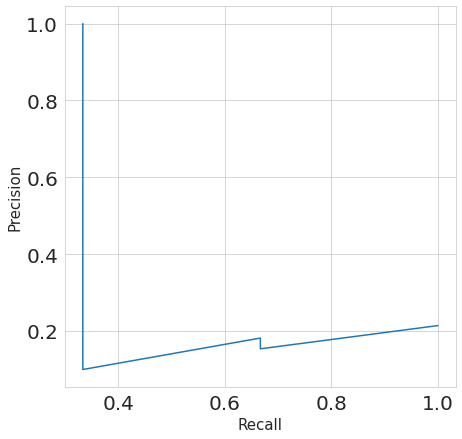

In [ ]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377, 0.08584789, 0.11114267, \
              0.11639273, 0.15952202, 0.17554844, 0.18521942, 0.27259048, \
              0.31620708, 0.33056815, 0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

This **precision-recall curve** looks very different from what you might have seen on the internet. It’s because we had only 20 samples, and only 3 of them were positive samples. But there’s nothing to worry. It’s the same old precision-recall curve.

- Both precision and recall range from 0 to 1 and a value closer to 1 is better.



**F1 score** is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall. If we denote precision using P and recall using R, we can represent the F1 score as:

        F1 = 2PR / (P + R)

A little bit of mathematics will lead you to the following equation of F1 based on **TP**, **FP** and **FN**. 

        F1 = 2TP / (2TP + FP + FN)





In [ ]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)

0.5714285714285715

In [ ]:
metrics.f1_score(y_true, y_pred)

0.5714285714285715

- Instead of looking at precision and recall individually, you can also just look at F1 score. 

- Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1, and a perfect prediction model has an F1 of 1. 

- **When dealing with datasets that have
skewed targets, we should look at F1 (or precision and recall) instead of accuracy.**


Then there are other crucial terms that we should know about. 

- The first one is **TPR or True Positive Rate**, which is the same as recall.

        TPR = TP / (TP + FN)

--> **TPR** or recall is also known as **sensitivity**.



In [ ]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)


- And the second one is **FPR or False Positive Rate**, which is defined as:

        FPR = FP / (TN + FP)

--> And **1 - FPR** is known as **specificity** or **True Negative Rate or TNR**

In [ ]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

For a typical threshold of >= 0.5, we can evaluate all the above values of precision, recall/TPR, F1 and FPR. But we can do the same if we choose the value of the
threshold to be 0.4 or 0.6. In fact, we can choose any value between 0 and 1 and
calculate all the metrics described above.

Let’s calculate only two values, though: TPR and FPR.


In [ ]:
# empty lists to store tpr
# and fpr values
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, \
          0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, \
              0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

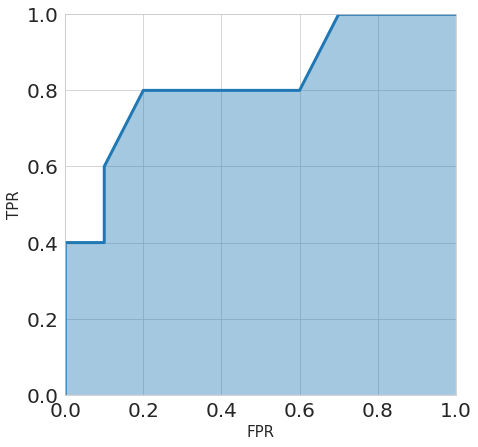

In [ ]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the Receiver Operating Characteristic (ROC). And if we calculate the area under this ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets.

This metric is known as the **Area Under ROC Curve or Area Under Curve** or
just simply **AUC**. There are many ways to calculate the area under the ROC curve. For this particular purpose, we will stick to the fantastic implementation by scikit-
learn.



In [ ]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, \
          0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC values range from 0 to 1.

- **AUC = 1** implies you have a perfect model. Most of the time, it means that you made some mistake with validation and should revisit data processing and validation pipeline of yours. If you didn’t make any mistakes, then congratulations, you have the best model one can have for the dataset you
built it on.

- **AUC = 0** implies that your model is very bad (or very good!). Try inverting the probabilities for the predictions, for example, if your probability for the positive class is p, try substituting it with 1-p. This kind of AUC may also mean that there is some problem with your validation or data processing.

- **AUC = 0.5** implies that your predictions are random. So, for any binary classification problem, if I predict all targets as 0.5, I will get an AUC of 0.5.


AUC values between 0 and 0.5 imply that your model is worse than random. Most
of the time, it’s because you inverted the classes. If you try to invert your
predictions, your AUC might become more than 0.5. AUC values closer to 1 are
considered good.


**Confusion Matrix**

Confusion matrix gives an easy way to calculate different metrics that we have discussed before. Scikit-learn offers an easy and straightforward way to generate a confusion matrix. 

Text(0.5, 13.5, 'Predicted Labels')

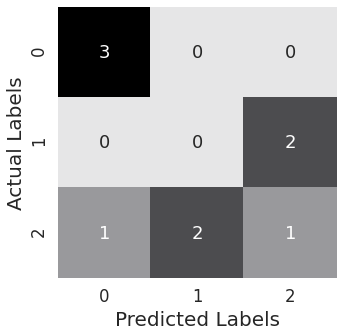

In [ ]:
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

We have tackled metrics for binary and multi-class classification. Then comes another type of classification problem called multi-label classification. 

In multi-label classification, each sample can have one or more
classes associated with it. One simple example of this type of problem would be a task in which you are asked to predict different objects in a given image.

The metrics for this type of classification problem are a bit different. Some suitable
and most common metrics are:

- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)
- Log loss



The most common metric in regression is error. Error is simple and very easy to
understand.

        Error = True Value – Predicted Value

**Absolute error** is just absolute of the above.

        Absolute Error = Abs (True Value – Predicted Value)


Then we have **mean absolute error (MAE)**. It’s just mean of all absolute errors.


In [ ]:
def mean_absolute_error(y_true, y_pred):
    """
    This function calculates mae
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate absolute error
        # and add to error
        error += np.abs(yt - yp)
    # return mean error
    return error / len(y_true)

Similarly, we have squared error and **mean squared error (MSE)**.

        Squared Error = (True Value – Predicted Value)^2

And mean **squared error (MSE)** can be implemented as follows.


In [ ]:
def mean_squared_error(y_true, y_pred):
    """
    This function calculates mse
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
    # return mean error
    return error / len(y_true)

**MSE** and **RMSE**(root mean squared error) are the most popular metrics used in evaluating regression models.

        RMSE = SQRT ( MSE )

Another type of error in same class is **squared logarithmic error**. Some people call it **SLE**, and when we take mean of this error across all samples, it is known as **MSLE (mean squared logarithmic error)** and implemented as follows.

In [ ]:
def mean_squared_log_error(y_true, y_pred):
    """
    This function calculates msle
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared logarithmic error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error
        # and add to error
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    # return mean error
    return error / len(y_true)

**Root mean squared logarithmic error** is just a square root of this. It is also known
as **RMSLE**.

Then we have the percentage error:

        Percentage Error = ( ( True Value – Predicted Value ) / True Value ) * 100

Same can be converted to mean percentage error for all samples.


In [ ]:
def mean_percentage_error(y_true, y_pred):
    """
    This function calculates mpe
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean percentage error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += (yt - yp) / yt
    # return mean percentage error
    return error / len(y_true)

And an absolute version of the same (and more common version) is known as **mean absolute percentage error or MAPE**

In [ ]:
def mean_abs_percentage_error(y_true, y_pred):
    """
    This function calculates MAPE
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute percentage error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += np.abs(yt - yp) / yt
    # return mean percentage error
    return error / len(y_true)

- The best thing about regression is that there are only a few most popular metrics that can be applied to almost every regression problem. 

- And it is much easier to understand when we compare it to classification metrics. Let’s talk about another regression metric known as **R2 (R-squared)**, also known as the **coefficient of determination**.

![R SQUARE](https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG)

In [ ]:
def r2(y_true, y_pred):
    """
    This function calculates r-squared score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: r2 score
    """
    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)
    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0
    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
        # calculate the ratio
        ratio = numerator / denominator
    # return 1 - ratio
    return 1 - ratio

## **Approaching categorical variables**

Categorical variables/features are any feature type can be classified into four major types

- **Nominal variable**: 

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.

- **Ordinal variable**:

Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can  be a
feature with three different levels: low, medium and high. Order is important.

- **Cyclic variable**

Cyclic variables are present in
“cycles” for example, days in a week: Sunday, Monday, Tuesday, Wednesday,
Thursday, Friday and Saturday. After Saturday, we have Sunday again. This is a
cycle. Another example would be hours in a day if we consider them to be
categories.

- **Binary variable**

As far as definitions are concerned, we can also categorize categorical variables as
binary, i.e., a categorical variable with only two categories.

In [ ]:
# Loading the cat-in-the-dat-ii data
!gdown --id 1GHopwY-WYx6zH39afYIsDcPxSBDl5uky --output cat_data_train.csv
!gdown --id 1Xd9z1G0H-H3ERKId8NLxoa_rygLFToJR --output cat_data_test.csv

Downloading...
From: https://drive.google.com/uc?id=1GHopwY-WYx6zH39afYIsDcPxSBDl5uky
To: /content/cat_data_train.csv
85.3MB [00:00, 98.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Xd9z1G0H-H3ERKId8NLxoa_rygLFToJR
To: /content/cat_data_test.csv
56.1MB [00:00, 91.3MB/s]


In [ ]:
df = pd.read_csv("cat_data_train.csv")
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [ ]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [ ]:
mapping = {"Freezing": 0, "Warm": 1,  "Cold": 2, "Boiling Hot": 3, "Hot": 4, "Lava Hot": 5}
dt_1 = pd.read_csv("cat_data_train.csv")
dt_1.loc[:, "ord_2"] = dt_1.ord_2.map(mapping)
dt_1.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

This type of encoding of categorical variables is known as **Label Encoding**, i.e., we are encoding every category as a numerical label.

We can do the same by using LabelEncoder from scikit-learn


In [ ]:
from sklearn import preprocessing

# read the data
dt = pd.read_csv("cat_data_train.csv")

# fill NaN values in ord_2 column
dt.loc[:, "ord_2"] = dt.ord_2.fillna("NONE")

# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()

# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
dt.loc[:, "ord_2"] = lbl_enc.fit_transform(dt.ord_2.values)

We can use fillna from pandas. The reason is LabelEncoder from scikit-
learn does not handle NaN values, and ord_2 column has NaN values in it.

We can use this directly in many tree-based models:
- Decision trees
- Random forest
- Extra Trees
- Or any kind of boosted trees model
    - XGBoost
    - GBM
    - LightGBM

This type of encoding cannot be used in linear models, support vector machines or
neural networks as they expect data to be normalized (or standardized).

For these types of models, we can binarize the data.

The difference in size becomes vast when we have much larger arrays, let’s say with thousands of samples and tens of thousands of features. For example, a text dataset where we are using count-based features.

In [ ]:
from scipy import sparse

# number of rows
n_rows = 10000

# number of columns
n_cols = 100000

# create random binary matrix with only 5% values as 1s
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))

# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 399992768
Full size of sparse array: 600029156


So, dense array takes ~8000MB or approximately 8GB of memory. The sparse
array, on the other hand, takes only 399MB of memory.

And, that’s the reason we should prefer sparse arrays over dense whenever we have a lot of zeros in our features.


Even though the sparse representation of binarized features takes much less
memory than its dense representation, there is another transformation for
categorical variables that takes even less memory. This is known as **One Hot Encoding**

**One hot encoding** is a binary encoding too in the sense that there are only two values, 0s and 1s. However, it must be noted that it’s not a binary representation. 

In [ ]:
from sklearn import preprocessing

# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)

# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)

# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")

# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)

# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")
full_size = (
ohe_example.data.nbytes +
ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of sparse array: 16000004


These three methods are the most important ways to handle categorical variables.There are, however, many other different methods you can use to handle categorical variables. An example of one such method is about converting categorical variables to numerical variables.

Suppose we go back to the categorical features dataframe (original cat-in-the-dat-ii) that we had. How many ids do we have in the dataframe where the value of ord_2 is Boiling Hot ?

We can easily calculate this value by calculating the shape of the dataframe where ord_2 column has the value Boiling Hot.



In [ ]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [ ]:
df[df.ord_2 == "Boiling Hot"].shape

(84790, 25)

We see that there are 84790 rows with this value. We can also calculate this value for all the categories using groupby in pandas

In [ ]:
df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

We can add counts of all the features or can also replace them or maybe group by multiple columns and their counts. For example, the following code counts by grouping on ord_1 and ord_2 columns.


In [ ]:
df.groupby(["ord_1", "ord_2"])["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


One more trick is to create new features from these categorical variables. We can create new categorical features from existing features, and this can be done in an effortless manner.


In [ ]:
df["new_feature"] = (df.ord_1.astype(str) + "_" + df.ord_2.astype(str))
df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

In [ ]:
df.new_feature.value_counts()

Novice_Freezing            38233
Novice_Warm                33263
Expert_Freezing            33249
Expert_Warm                28900
Novice_Cold                26271
Contributor_Freezing       26082
Expert_Cold                22956
Grandmaster_Freezing       22818
Contributor_Warm           22774
Novice_Boiling Hot         22718
Grandmaster_Warm           19899
Expert_Boiling Hot         19477
Master_Freezing            18035
Novice_Hot                 17850
Contributor_Cold           17734
Novice_Lava Hot            17373
Expert_Hot                 15792
Master_Warm                15734
Contributor_Boiling Hot    15634
Grandmaster_Cold           15464
Expert_Lava Hot            15078
Grandmaster_Boiling Hot    13623
Contributor_Hot            12428
Master_Cold                12364
Contributor_Lava Hot       11919
Grandmaster_Hot            10805
Master_Boiling Hot         10800
Grandmaster_Lava Hot       10363
Master_Hot                  8594
Master_Lava Hot             8209
Novice_nan

In [ ]:
# read training data
train = pd.read_csv("cat_data_train.csv")

#read test data
test = pd.read_csv("cat_data_test.csv")

# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1

# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)

# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]

# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)

# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

In [ ]:
# df.ord_4 = df.ord_4.fillna("NONE")
# df.loc[df["ord_4"].value_counts()[df["ord_4"]].values < 2000,"ord_4"] = "RARE"